Task: 
$\newline$
1.Extracting the s-layer closest to 2 meters in depth. 
$\newline$
2. Create matrix saving the s-layer indexes
$\newline$
3. Plot the matrix.

Firstly doing so for a dataset in 2024 and repeating for other time steps as well as other dates to see if there are any larger changes due to ocean surface elevations

$\newline$

s_rho describes the layers indexed from 0-40 (39), but the depth of the actual layer will vary. It is therefore I need to find which s-layer, 1,2, or 3 etc. that reperesents 2meters at each grid point. Each grid point is 800mx800m in x,y. 

In [27]:
#Importing necessary datasets
import xarray as xr
import matplotlib.pyplot as plt 
import numpy as np 

In [28]:
file = f'/lustre/storeA/project/fou/hi/oper/norkyst_v3/forecast/his/2025/06/01/norkyst800_his_sdepth_20250601T00Z_m00_AN.nc'
#dataset of NORKYST 01.06.2025
ds_norkyst_2024 = xr.open_dataset(file, engine="netcdf4").isel(ocean_time = 0)

ds_norkyst_2024.head()

<xarray.Dataset> Size: 9kB
Dimensions:          (s_w: 5, eta_rho: 5, xi_rho: 5, tracer: 2, s_rho: 5,
                      boundary: 4, eta_psi: 5, xi_psi: 5, eta_u: 5, xi_u: 5,
                      eta_v: 5, xi_v: 5)
Coordinates:
    lat_psi          (eta_psi, xi_psi) float64 200B ...
    lat_rho          (eta_rho, xi_rho) float64 200B ...
    lat_u            (eta_u, xi_u) float64 200B ...
    lat_v            (eta_v, xi_v) float64 200B ...
    lon_psi          (eta_psi, xi_psi) float64 200B ...
    lon_rho          (eta_rho, xi_rho) float64 200B ...
    lon_u            (eta_u, xi_u) float64 200B ...
    lon_v            (eta_v, xi_v) float64 200B ...
    ocean_time       datetime64[ns] 8B 2025-06-01
  * s_rho            (s_rho) float64 40B -0.9799 -0.9403 -0.9014 -0.8634 -0.8261
  * s_w              (s_w) float64 40B -1.0 -0.96 -0.9208 -0.8823 -0.8446
Dimensions without coordinates: eta_rho, xi_rho, tracer, boundary, eta_psi,
                                xi_psi, eta_u, xi_u, eta_v, xi_v
Data variables: (12/101)
    AKs              (s_w, eta_rho, xi_rho) float32 500B ...
    Akk_bak          float64 8B ...
    Akp_bak          float64 8B ...
    Akt_bak          (tracer) float64 16B ...
    Akv_bak          float64 8B ...
    Charnok_alpha    float64 8B ...
    ...               ...
    v                (s_rho, eta_v, xi_v) float32 500B ...
    v_northward      (s_rho, eta_rho, xi_rho) float32 500B ...
    vbar             (eta_v, xi_v) float32 100B ...
    w                (s_w, eta_rho, xi_rho) float32 500B ...
    xl               float64 8B ...
    zeta             (eta_rho, xi_rho) float32 100B ...
Attributes: (12/33)
    file:              /nobackup/prod1/metno_op/run/norkyst_v3/output/m00/nor...
    format:            netCDF-4/HDF5 file
    Conventions:       CF-1.4, SGRID-0.3
    type:              ROMS/TOMS history file
    title:             Norkyst V3 forecast model (MET Norway/IMR)
    var_info:          /nobackup/prod1/metno_op/run/norkyst_v3/static_input/n...
    ...                ...
    compiler_flags:    -mcmodel=large -O3
    tiling:            032x016
    ana_file:          ROMS/Functionals/ana_btflux.h, ROMS/Functionals/ana_sr...
    CPP_options:       NORKYST, ADD_FSOBC, ADD_M2OBC, ALBEDO, ANA_BSFLUX, ANA...
    NCO:               netCDF Operators version 4.8.1 (Homepage = http://nco....
    history:           Sun Jun  1 18:00:04 2025: ncks -O -7 -L 1 --ppc defaul...

In [29]:
ds_norkyst_2024.s_rho.values
#ds_norkyst_2024.s_w.values

array([-0.97990385, -0.94028846, -0.90144231, -0.86336538, -0.82605769,
       -0.78951923, -0.75375   , -0.71875   , -0.68451923, -0.65105769,
       -0.61836538, -0.58644231, -0.55528846, -0.52490385, -0.49528846,
       -0.46644231, -0.43836538, -0.41105769, -0.38451923, -0.35875   ,
       -0.33375   , -0.30951923, -0.28605769, -0.26336538, -0.24144231,
       -0.22028846, -0.19990385, -0.18028846, -0.16144231, -0.14336538,
       -0.12605769, -0.10951923, -0.09375   , -0.07875   , -0.06451923,
       -0.05105769, -0.03836538, -0.02644231, -0.01528846, -0.00490385])

In [30]:
ds_norkyst_2024.lon_rho.values
#print(ds_norkyst_2024["s_rho"][1])

array([[ 8.69997235,  8.70570332,  8.71143639, ..., 37.5191625 ,
        37.53684697, 37.55453838],
       [ 8.68950535,  8.69523499,  8.70096672, ..., 37.5079033 ,
        37.52559101, 37.54328568],
       [ 8.67903627,  8.68476457,  8.69049496, ..., 37.49663715,
        37.51432811, 37.53202603],
       ...,
       [-4.58960856, -4.58612302, -4.58263593, ..., 18.33948305,
        18.35848086, 18.37749461],
       [-4.60225177, -4.5987688 , -4.5952843 , ..., 18.31546381,
        18.33445785, 18.35346782],
       [-4.61489652, -4.61141613, -4.60793421, ..., 18.29142864,
        18.31041889, 18.32942509]], shape=(1148, 2747))

In [31]:
ds_norkyst_2024.lat_rho.values

array([[54.29489733, 54.30101935, 54.30714124, ..., 69.23725636,
        69.24124894, 69.24523963],
       [54.29824854, 54.30437129, 54.3104939 , ..., 69.24352923,
        69.24752312, 69.25151512],
       [54.3015987 , 54.30772217, 54.31384551, ..., 69.24980144,
        69.25379664, 69.25778995],
       ...,
       [57.34035891, 57.34719482, 57.35403084, ..., 75.70472299,
        75.71065353, 75.71658259],
       [57.3422424 , 57.34907879, 57.3559153 , ..., 75.70941265,
        75.71534522, 75.7212763 ],
       [57.34412441, 57.35096127, 57.35779826, ..., 75.71409987,
        75.72003447, 75.72596758]], shape=(1148, 2747))

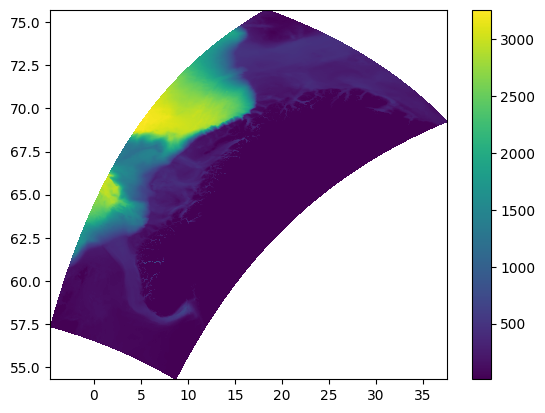

In [32]:
#Vizualitation of the depth of the ocean. Remember that the top layer is the ocean bottom. Meaning yellow is as low as it goes. 
#Therefore h is a representation of the total depth.
plt.pcolor(ds_norkyst_2024["lon_rho"], ds_norkyst_2024["lat_rho"], ds_norkyst_2024["h"])
plt.colorbar()

In [33]:
#Dobbeltsjekker størrelsen på s_rho. Den inneholder 40 verdier. 
print(ds_norkyst_2024["s_rho"].__len__)

#lager en linspace som går fra -1 til 0 og dekker alle 40 verdier i s_rho settet. 
#Her er -1 ved havbunnen og 0 er ved overflaten. Dvs. indeks s_rho = -1 er overflaten, indeks s_rho = -1 er bunn. 
N = 40
S = np.linspace(-1,0,N)

<bound method DataArray.__len__ of <xarray.DataArray 's_rho' (s_rho: 40)> Size: 320B
array([-0.979904, -0.940288, -0.901442, -0.863365, -0.826058, -0.789519,
       -0.75375 , -0.71875 , -0.684519, -0.651058, -0.618365, -0.586442,
       -0.555288, -0.524904, -0.495288, -0.466442, -0.438365, -0.411058,
       -0.384519, -0.35875 , -0.33375 , -0.309519, -0.286058, -0.263365,
       -0.241442, -0.220288, -0.199904, -0.180288, -0.161442, -0.143365,
       -0.126058, -0.109519, -0.09375 , -0.07875 , -0.064519, -0.051058,
       -0.038365, -0.026442, -0.015288, -0.004904])
Coordinates:
    ocean_time  datetime64[ns] 8B 2025-06-01
  * s_rho       (s_rho) float64 320B -0.9799 -0.9403 ... -0.01529 -0.004904
Attributes:
    long_name:      S-coordinate at RHO-points
    valid_min:      -1.0
    valid_max:      0.0
    positive:       up
    standard_name:  ocean_s_coordinate_g2
    formula_terms:  s: s_rho C: Cs_r eta: zeta depth: h depth_c: hc
    field:          s_rho, scalar>


For å gjøre om fra s-lag til dybde forsøker jeg en metode funnet ved bruk av xroms som gjør:
""legg inn den matematiske metoden her dersom det funker""

In [34]:
#Henter ut alle variabler som trengs til regningen
hc = ds_norkyst_2024["hc"] #Critical depth for stretching
cs_r = ds_norkyst_2024["Cs_r"] #stretching curve at rho points
zeta = ds_norkyst_2024["zeta"] #.fillna(0) #free-surface 
H = ds_norkyst_2024["h"] #bathymetry at rho-points (depth)
theta_s = ds_norkyst_2024["theta_s"] #stretching surface
theta_b = ds_norkyst_2024["theta_b"] #stretching bottom 
Vtransform = ds_norkyst_2024["Vtransform"]
s_rho = ds_norkyst_2024["s_rho"]

In [35]:
#ds_norkyst_2024.dims
#hc.dims
#cs_r.dims
zeta.dims
#H.dims
#theta_b.dims
#theta_s.dims

('eta_rho', 'xi_rho')

Trying a new approach but still xroms / xarray example:
$\newline$
$Z_0 = \frac{h_c \cdot S + h \cdot C}{h_c + h }$
$\newline$
$z = Z_0 (\zeta + h) + \zeta$
$\newline$
This creates a new datacoordinate Z_rho. 

Explanation: 
The code calculates the midpoint of each s-layer depending on which transformation is found in the V-transform. I dont fully understand the Vtransform, but I understand that V-transform == 2 is more regulary used for newer ROMS models. 
$\newline$
The calculations create a variable $Z_0$ which is calculated by the use of:
$\newline$
hc = critical depth for stretching 
$\newline$
$s_rho$ = s-layers 
$\newline$
h = total depth
$\newline$
$Cs_r$ = stretching curve for the rho points
$\newline$
$\zeta$ = free surface  
$\newline$

So I think:
$Z_0$ explains the depth at a given grid cell using the stretching features including the topography, but that it excludes the surface layer.
Therefore I believe $z_{rho}$ then includes the surface elevation by including $\zeta$ in the calculations and providing the dataset with a new coordinate defining the depth of the grid cells. 

In [36]:
if Vtransform == 1:
    Z_0_rho = hc * (s_rho - cs_r) + cs_r * H
    z_rho = Z_0_rho + zeta * (1+Z_0_rho/H)
elif Vtransform == 2:
    #The same function as tried above
    Z_0_rho = (hc * s_rho + cs_r * H) / (hc + H)
    z_rho = zeta + (zeta + H) * Z_0_rho

ds_norkyst_2024.coords["z_rho"] = z_rho.transpose() #Corrects the dimensions

In [37]:
#making sure the new coordinate Z_rho is there and has values. though there are many nans
#ds_norkyst_2024.coords
ds_norkyst_2024.z_rho.values
#zeta.values
#as seen above, the nan comes from the zeta values where there is land, which means it is okay with nans in our s-layer dataset

array([[[          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        ...,
        [-192.11640524, -192.07971119, -192.01208293, ...,
         -137.86266642, -139.41168345, -140.22655953],
        [-192.18886576, -192.14201554, -192.05746991, ...,
         -134.46192383, -135.8157252 , -136.51559757],
        [-192.19369907, -192.14343256, -192.05066904, ...,
         -132.64066073, -133.86980865, -134.4986434 ]],

       [[          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
              

In [38]:
#Defining the variables I wish to use
ocean_time = ds_norkyst_2024["ocean_time"]

#Adding longitude and latitude as coordinates to Z-rho
ds_norkyst_2024["z_rho"] = ds_norkyst_2024["z_rho"].assign_coords(lon_rho = ds_norkyst_2024["lon_rho"], lat_rho = ds_norkyst_2024["lat_rho"])
s_rho_overflate = ds_norkyst_2024["z_rho"].isel(s_rho =-1)
s_rho_bunn = ds_norkyst_2024["z_rho"].isel(s_rho=1)

#Controlruns to check wether the depth values are correct or not
plt.pcolormesh(s_rho_overflate[:,:,0])
plt.colorbar()
plt.title("s_rho: surface layer")

IndexError: too many indices

Text(0.5, 1.0, 'S_rho: bottom layer')

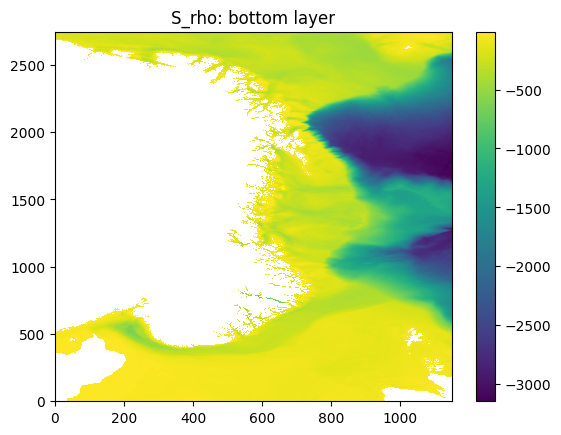

In [ ]:
plt.pcolormesh(s_rho_bunn[:,:,0])
plt.colorbar()
plt.title("S_rho: bottom layer")

Text(0.5, 1.0, 'depth (H)')

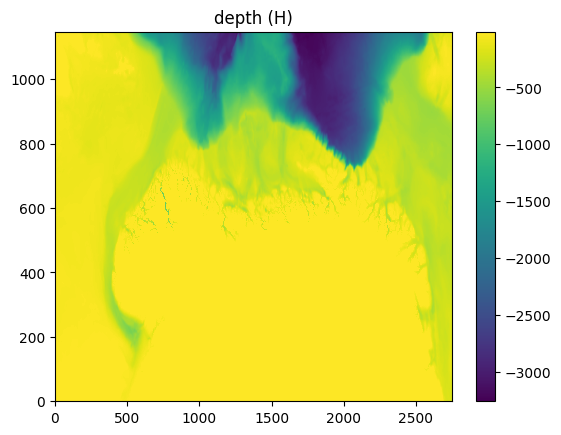

In [ ]:
plt.pcolormesh(-H)
plt.colorbar()
plt.title("depth (H)")

The plots seems correct when comparing the surface and bottom layer to the H plot. The function for turning the s-values into z_rho might have worked well.

Next goal:
Creating matrixes / arrays containing the following information:
1. 2D array representing a control-run of the results. The 2D array should look like: [-1.5, -4.3, -1.95, -2.15] etc and show the depth that has been used "nearest" two meters for each grid point. 
2. Then we need an s-layer array also in 2D like: [0, 3, 2, 1, 4, 2] showing the s-layer closest to two meters for each grid point.


In [ ]:
#Creating two arrays
control_run = []
s_layer_array = []

#Fordi hvert grid point i prinsippet skal inneholde en verdi som er for hele 800x800m gridpointet, så burde det i teorien ikke være flere verdier i val enn en for hver indeks?




In [ ]:
#calculating the difference from the absolute value to check the value closest to two, not sure if this is the best approach but we try
diff = abs(ds_norkyst_2024["z_rho"]-2)
diff = diff.fillna(0)

#print(diff)

#to find the lowest value, i.e the value closest to zero after subtracting the two value
index = diff.argmin(dim = "s_rho")

#Selekterer ut indeksen til laget nærmest 2 meter i verdi 
naermeste_verdi = z_rho.isel(s_rho=index)

#Sjekker om det funker, it does not :))
print(f'Nærmeste verdi: {naermeste_verdi}, i dybdelag nr: {index}')


Nærmeste verdi: <xarray.DataArray (eta_rho: 1148, xi_rho: 2747)> Size: 25MB
array([[        nan,         nan,         nan, ..., -0.78198937,
        -0.77893584, -0.77893776],
       [        nan,         nan,         nan, ..., -0.78505531,
        -0.78150937, -0.77890912],
       [        nan,         nan,         nan, ..., -0.78802215,
        -0.78440813, -0.78170409],
       ...,
       [        nan,         nan,         nan, ..., -0.80212004,
        -0.79966593, -0.79938819],
       [        nan,         nan,         nan, ..., -0.80310855,
        -0.80067075, -0.80009487],
       [        nan,         nan,         nan, ..., -0.80511676,
        -0.80247808, -0.80066795]], shape=(1148, 2747))
Coordinates:
    lat_rho     (eta_rho, xi_rho) float64 25MB 54.29 54.3 54.31 ... 75.72 75.73
    lon_rho     (eta_rho, xi_rho) float64 25MB 8.7 8.706 8.711 ... 18.31 18.33
    ocean_time  datetime64[ns] 8B 2025-06-01
    s_rho       (xi_rho, eta_rho) float64 25MB -0.9799 -0.9799 ... -0.0049

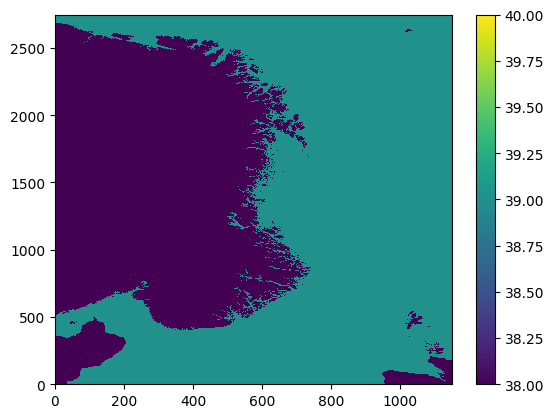

In [49]:
plt.pcolormesh(index, vmin=38, vmax=40)
plt.colorbar()